In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import models, layers, losses, optimizers, datasets, preprocessing, utils
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.datasets import cifar10

# 01 데이터 로드, 전처리

In [2]:
# 데이터 불러오기
 
(x_full, y_full), (x_test, y_test) = cifar10.load_data()

print('전체 원본 데이터:', x_full.shape)
print('전체 원본 라벨:', y_full.shape)
print('전체 평가 데이터:', x_test.shape)
print('전체 평가 라벨:', y_test.shape)

전체 원본 데이터: (50000, 32, 32, 3)
전체 원본 라벨: (50000, 1)
전체 평가 데이터: (10000, 32, 32, 3)
전체 평가 라벨: (10000, 1)


In [3]:
# 라벨값 확인

np.unique(y_full, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [4]:
# 이미지의 픽셀 값 확인

print(x_full.min(), '~', x_full.max())

0 ~ 255


In [5]:
# 각 라벨의 클래스명 지정

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

[6]


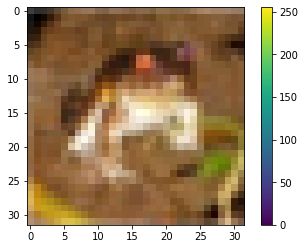

In [6]:
# 이미지 및 라벨 확인

print(y_full[0])
plt.figure()
plt.imshow(x_full[0])
plt.colorbar()
plt.show()

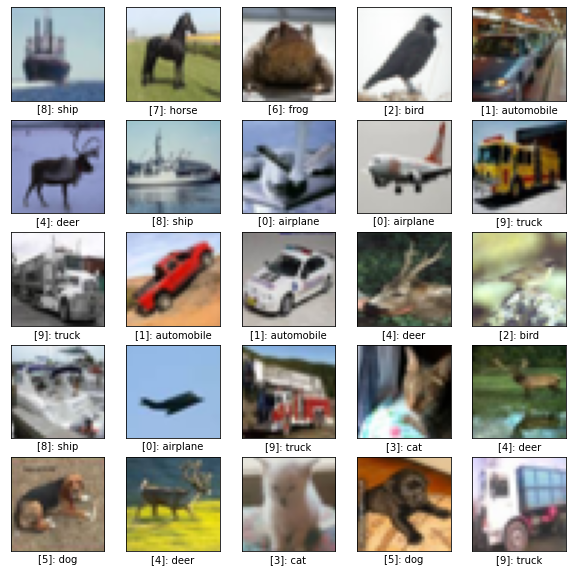

In [7]:
# 여러 개 이미지 및 라벨값, 클래스명 확인

plt.figure(figsize=(10,10))
for idx, idx_img in enumerate(np.random.randint(0, 4999, 25)):
    plt.subplot(5, 5, idx+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_full[idx_img])
    plt.xlabel(f'{y_full[idx_img]}: {class_names[y_full[idx_img][0]]}')
plt.show()

In [9]:
# 훈련 데이터 및 검증 데이터 분리

x_train, x_val, y_train, y_val = train_test_split(
    x_full, y_full, test_size = 0.2, random_state=42
)

print('훈련 데이터:', x_train.shape)
print('훈련 라벨:', y_train.shape)
print('검증 데이터:', x_val.shape)
print('검증 라벨:', y_val.shape)

훈련 데이터: (40000, 32, 32, 3)
훈련 라벨: (40000, 1)
검증 데이터: (10000, 32, 32, 3)
검증 라벨: (10000, 1)


# 02 모델 구성

In [10]:
model = models.Sequential()

# block1
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.2))  

# block 2
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.3))

# block 3
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.4))

# Head of the model
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

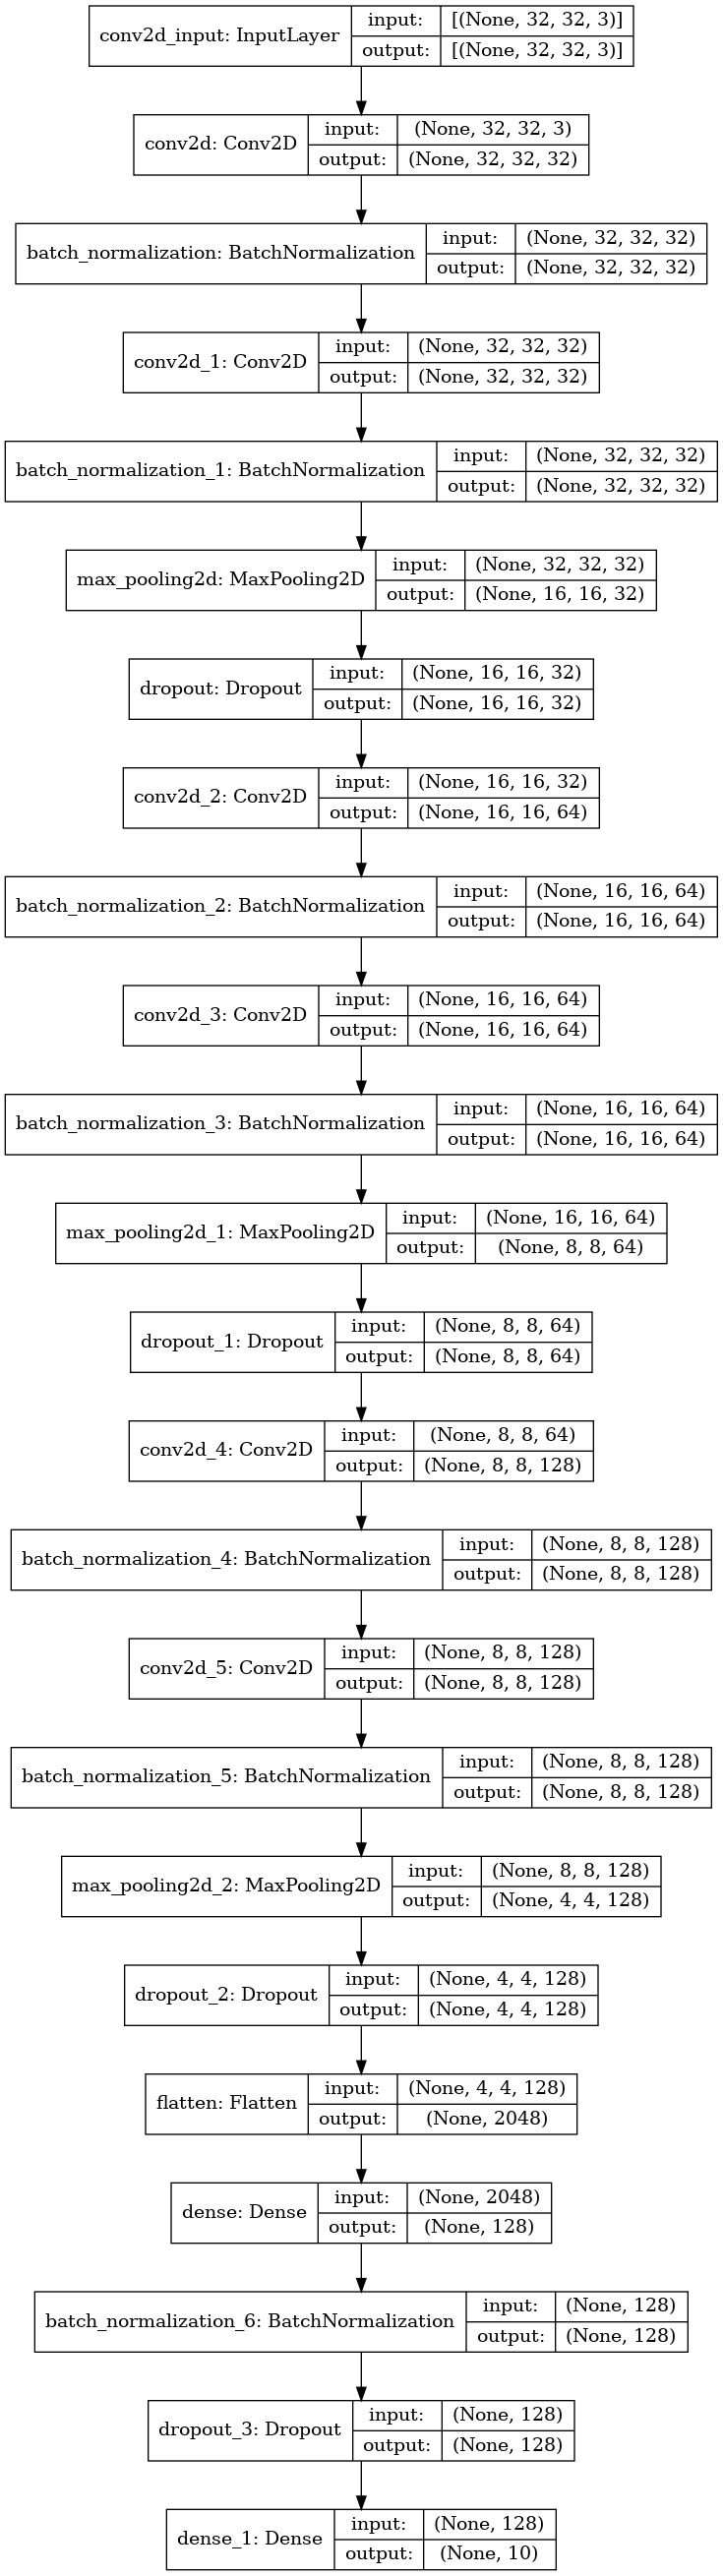

In [17]:
utils.plot_model(model, show_shapes=True, show_layer_names=True)

# 03 모델 학습

In [15]:
# 컴파일

from tensorflow.keras.optimizers import Adam

# Adam 옵티마이저 객체 생성
custom_adam = Adam(learning_rate=0.0001)

# 모델 컴파일 시 옵티마이저로 custom_adam 사용
model.compile(optimizer=custom_adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# 모델 학습

from tensorflow.keras import callbacks

early_stopping_cb = callbacks.EarlyStopping(patience=5,
                                            monitor='val_loss',
                                            restore_best_weights=True)


history = model.fit(
    x_train, y_train, epochs = 60,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping_cb]
)

Epoch 1/60
1250/1250 [==============================] - 13s 7ms/step - loss: 2.4106 - accuracy: 0.2680 - val_loss: 1.6159 - val_accuracy: 0.4250
Epoch 2/60
1250/1250 [==============================] - 8s 7ms/step - loss: 1.8405 - accuracy: 0.3792 - val_loss: 1.4572 - val_accuracy: 0.4817
Epoch 3/60
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5893 - accuracy: 0.4473 - val_loss: 1.3507 - val_accuracy: 0.5240
Epoch 4/60
1250/1250 [==============================] - 8s 7ms/step - loss: 1.4156 - accuracy: 0.4986 - val_loss: 1.1821 - val_accuracy: 0.5748
Epoch 5/60
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2891 - accuracy: 0.5434 - val_loss: 1.0414 - val_accuracy: 0.6303
Epoch 6/60
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1746 - accuracy: 0.5864 - val_loss: 0.9728 - val_accuracy: 0.6561
Epoch 7/60
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0950 - accuracy: 0.6146 - val_loss: 0.9476 - val_accuracy

# 04 모델 평가

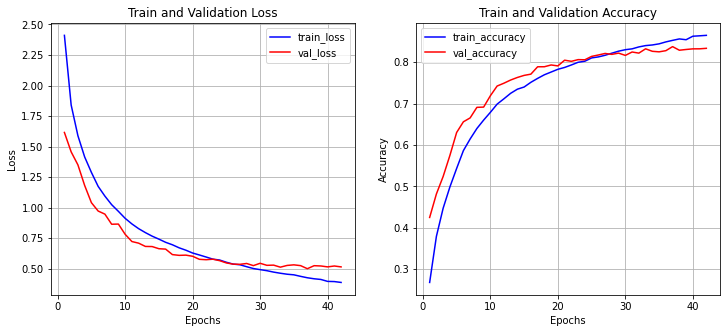

In [17]:
# 손실 곡선 확인

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5130 - accuracy: 0.8281


[0.5129789113998413, 0.8281000256538391]

In [47]:
# 모델의 predict 메서드를 사용하여 예측 수행
pred = model.predict(x_test)

# 예측된 확률 분포 중에서 가장 높은 값을 가진 클래스 선택
pred_classes = np.argmax(pred, axis=1)

# y_test를 pred_classes의 형태와 맞추기 (10000, 1) -> (10000,)
y_test_data = np.squeeze(y_test)

# 예측된 클래스와 실제 클래스 비교
count_same = np.mean(pred_classes == y_test_data)

print(f'테스트 데이터의 정확도: {count_same}')

테스트 데이터의 정확도: 0.8281


In [55]:
# 사이킷런의 모듈로 정확도 확인

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred_classes)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8281


In [56]:
# 분류 보고서

from sklearn.metrics import classification_report

class_report = classification_report(y_test, pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.94      0.90      0.92      1000
           2       0.80      0.70      0.75      1000
           3       0.76      0.64      0.70      1000
           4       0.76      0.84      0.80      1000
           5       0.75      0.75      0.75      1000
           6       0.79      0.92      0.85      1000
           7       0.88      0.84      0.86      1000
           8       0.90      0.91      0.91      1000
           9       0.88      0.91      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



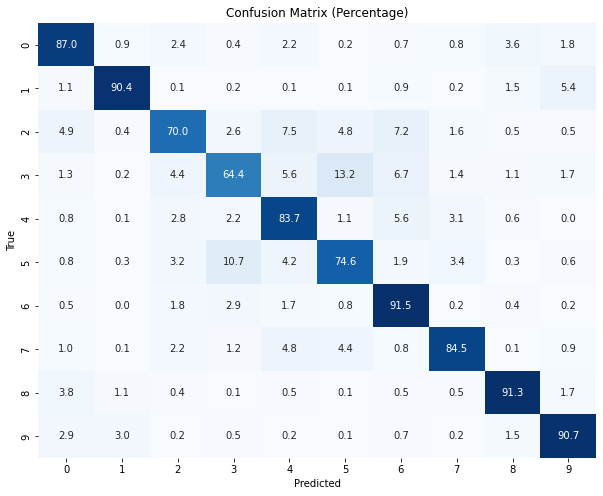

In [60]:
# 혼동행렬

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 모델의 predict 메서드를 사용하여 예측 수행
pred = model.predict(x_test)

# 예측된 확률 분포 중에서 가장 높은 값을 가진 클래스 선택
pred_classes = np.argmax(pred, axis=1)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, pred_classes)

# 정규화하여 백분율로 변환
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.1f', cmap='Blues', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()
